In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data_city = pd.read_csv("raw_data/city_data.csv")

data_city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
data_ride = pd.read_csv("raw_data/ride_data.csv")

data_ride.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
merge_table = pd.merge(data_ride, data_city, on="city", how="outer")

In [5]:
merge_table.head(5)

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [6]:
# Urban
Urban = merge_table.loc[merge_table["type"] == "Urban"]
Urban.head(2)

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban


In [7]:
urban_group = Urban.groupby("city")

urban_x = urban_group["ride_id"].count()

urban_y = urban_group["fare"].mean()

urban_size = urban_group["driver_count"].mean()

plt.scatter(urban_x, urban_y, marker="o", facecolors="blue",
edgecolors="black", s = urban_size, alpha = 0.40, label = "Urban")


In [8]:
# Suburban
Suburban = merge_table.loc[merge_table["type"] == "Suburban"]

Suburban.head(2)

,city,date,fare,ride_id,driver_count,type
1625,Port James,2016-12-04 06:16:36,15.77,2259499336994,15,Suburban
1626,Port James,2016-12-04 06:16:36,15.77,2259499336994,3,Suburban


In [9]:
Suburban_group = Suburban.groupby("city")

Suburban_x = Suburban_group["ride_id"].count()

Suburban_y = Suburban_group["fare"].mean()

Suburban_size = urban_group["driver_count"].mean()

plt.scatter(Suburban_x, Suburban_y, marker="o", facecolors="red", edgecolors="black", 
s = Suburban_size, alpha = 0.40, label = "Suburb")

In [10]:
# Rural
Rural = merge_table.loc[merge_table["type"] == "Rural"]

Rural.head(2)

,city,date,fare,ride_id,driver_count,type
2282,Horneland,2016-07-19 10:07:33,12.63,8214498891817,8,Rural
2283,Horneland,2016-03-22 21:22:20,31.53,1797785685674,8,Rural


In [11]:
Rural_group = Rural.groupby("city")

Rural_x = Rural_group["ride_id"].count()

Rural_y = Rural_group["fare"].mean()

Rural_size = Rural_group["driver_count"].mean()

plt.scatter(Rural_x, Rural_y, marker="o", facecolors="orange", #edgecolors="black", 
s = Rural_size, alpha = 0.90, label = "Rural")

In [12]:
plt.legend(loc="best")

In [13]:
plt.title("Pyber segmentation data")
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($) Per City")

Text(0,0.5,'Average Fare ($) Per City')

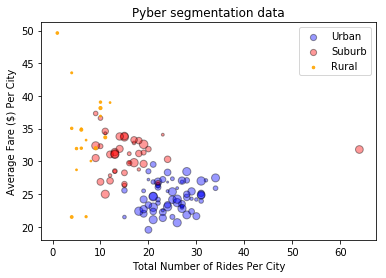

In [14]:
plt.show()

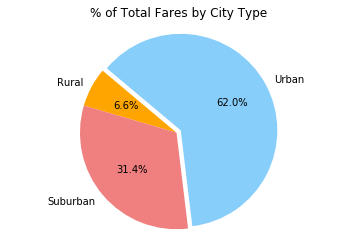

In [70]:
groupby_ = merge_table.groupby("type")

fare_segment = groupby_["fare"].sum() 

city_type  = fare_segment.index
city_type_fare = fare_segment.values
explode = (0, 0, 0.05)
colors = ["orange", "lightcoral", "lightskyblue"]
plt.pie(city_type_fare, explode=explode, labels=city_type, colors=colors, autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.show()